In [1]:
from bs4 import BeautifulSoup
import requests
import openpyxl

In [2]:
excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = 'Top 250 Movies by IMDB'
sheet.append(['Rank','Movie Name','Duration','Rating Type','year','Rating','Votes'])

In [3]:
def convert(Votes):
    for i in Votes:
        multiplier = 1
        if 'M' in i:
            multiplier = 1e6
            i = int(float(Votes.replace('M', '')) * multiplier)
        elif 'K' in i:
            multiplier = 1e3
            i = int(float(Votes.replace('K', '')) * multiplier)
    return(i)

In [4]:
try:
    url = 'https://www.imdb.com/chart/top/'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(url, headers=headers)
    soup = BeautifulSoup(result.text,'html.parser')
    movies = soup.find("ul", class_='ipc-metadata-list ipc-metadata-list--dividers-between sc-3f13560f-0 sTTRj compact-list-view ipc-metadata-list--base').find_all('li', class_ = 'ipc-metadata-list-summary-item sc-59b6048d-0 jemTre cli-parent')
    for movie in movies:
        rank = movie.find('h3', class_='ipc-title__text').get_text(strip=True).split('.')[0]
        
        name = movie.find('h3', class_='ipc-title__text').get_text(strip=True).split('.')[1]
        
        year = movie.find('span', class_="sc-6fa21551-8 bnyjtW cli-title-metadata-item").text
        
        Votes = movie.find('span', class_="ipc-rating-star--voteCount").get_text().strip('()').split('(')[1]
        
        Votes_count = convert(Votes)

        rating = movie.find('div',class_="sc-e3e7b191-0 iKUUVe sc-6fa21551-2 kOfhdG cli-ratings-container").get_text(strip=True).split('(')[0]
        
        rating_type = movie.find('div', class_='sc-6fa21551-7 jLjTzn cli-title-metadata').find('span').find_next('span').find_next('span').text
        
        duration = movie.find('div', class_='sc-6fa21551-7 jLjTzn cli-title-metadata').find('span').find_next('span').text

        print(rank,name,duration,rating_type,year,rating,Votes_count)
        
        sheet.append([rank,name,duration,rating_type,year,rating,Votes_count])
except Exception as e:
    print(e)
    

1  The Shawshank Redemption 2h 22m A 1994 9.3 2800000
2  The Godfather 2h 55m A 1972 9.2 2000000
3  The Dark Knight 2h 32m UA 2008 9.0 2800000
4  The Godfather: Part II 3h 22m A 1974 9.0 1300000
5  12 Angry Men 1h 36m U 1957 9.0 835000
6  Schindler's List 3h 15m A 1993 9.0 1400000
7  The Lord of the Rings: The Return of the King 3h 21m U 2003 9.0 1900000
8  Pulp Fiction 2h 34m A 1994 8.9 2200000
9  The Lord of the Rings: The Fellowship of the Ring 2h 58m U 2001 8.8 1900000
10  Il Buono, Il Brutto, Il Cattivo 2h 41m A 1966 8.8 791000
11  Forrest Gump 2h 22m UA 1994 8.8 2200000
12  Fight Club 2h 19m A 1999 8.8 2200000
13  The Lord of the Rings: The Two Towers 2h 59m UA 2002 8.8 1700000
14  Inception 2h 28m UA 2010 8.8 2500000
15  Star Wars: Episode V - The Empire Strikes Back 2h 4m UA 1980 8.7 1300000
16  The Matrix 2h 16m A 1999 8.7 2000000
17  GoodFellas 2h 25m A 1990 8.7 1200000
18  One Flew Over the Cuckoo's Nest 2h 13m A 1975 8.7 1000000
19  Se7en 2h 7m A 1995 8.6 1700000
20  Spider

192  The General 1h 18m Passed 1926 8.1 96000
193  The Deer Hunter 3h 3m A 1978 8.1 353000
194  Smultronstället 1h 31m U 1957 8.1 112000
195  Le Salaire De La Peur 2h 11m U 1953 8.2 65000
196  The Third Man 1h 44m U 1949 8.1 178000
197  Relatos Salvajes 2h 2m 18 2014 8.1 210000
198  Sherlock Jr 45m Passed 1924 8.2 54000
199  Dead Poets Society 2h 8m U 1989 8.1 523000
200  Mad Max: Fury Road 2h UA 2015 8.1 1100000
201  Mr 2h 9m U 1939 8.1 119000
202  Monsters, Inc 1h 32m U 2001 8.1 951000
203  How to Train Your Dragon 1h 38m U 2010 8.1 777000
204  Jaws 2h 4m A 1975 8.1 641000
205  Mary and Max 1h 32m U 2009 8.1 183000
206  Det Sjunde Inseglet 1h 36m A 1957 8.1 193000
207  Room 1h 58m U 2015 8.1 439000
208  Ford v 2h 32m UA 2019 8.1 439000
209  The Big Lebowski 1h 57m UA 1998 8.1 840000
210  Tokyo Story 2h 16m U 1953 8.1 66000
211  Ratatouille 1h 51m U 2007 8.1 790000
212  Rocky 2h U 1976 8.1 611000
213  Hotel Rwanda 2h 1m UA 2004 8.1 366000
214  La passion de Jeanne d'Arc 1h 50m Passed 

In [5]:
excel.save('IMDB top movies.xlsx')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel('IMDB top movies.xlsx')
df

,Rank,Movie Name,Duration,Rating Type,year,Rating,Votes
0,1,The Shawshank Redemption,2h 22m,A,1994,9.3,2800000
1,2,The Godfather,2h 55m,A,1972,9.2,2000000
2,3,The Dark Knight,2h 32m,UA,2008,9.0,2800000
3,4,The Godfather: Part II,3h 22m,A,1974,9.0,1300000
4,5,12 Angry Men,1h 36m,U,1957,9.0,835000
...,...,...,...,...,...,...,...
245,246,The 400 Blows,1h 39m,U,1959,8.1,125000
246,247,Persona,1h 25m,Not Rated,1966,8.1,127000
247,248,Life of Brian,1h 34m,R,1979,8.0,415000
248,249,Aladdin,1h 30m,U,1992,8.0,450000


In [16]:
df = df.set_index('Rank')
df

,Movie Name,Duration,Rating Type,year,Rating,Votes
Rank,,,,,,
1,The Shawshank Redemption,2h 22m,A,1994,9.3,2800000
2,The Godfather,2h 55m,A,1972,9.2,2000000
3,The Dark Knight,2h 32m,UA,2008,9.0,2800000
4,The Godfather: Part II,3h 22m,A,1974,9.0,1300000
5,12 Angry Men,1h 36m,U,1957,9.0,835000
...,...,...,...,...,...,...
246,The 400 Blows,1h 39m,U,1959,8.1,125000
247,Persona,1h 25m,Not Rated,1966,8.1,127000
248,Life of Brian,1h 34m,R,1979,8.0,415000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Name   250 non-null    object 
 1   Duration     250 non-null    object 
 2   Rating Type  250 non-null    object 
 3   year         250 non-null    int64  
 4   Rating       250 non-null    float64
 5   Votes        250 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.7+ KB


In [18]:
df.describe()

,year,Rating,Votes
count,250.000000,250.000000,2.500000e+02
mean,1986.816000,8.307600,6.719560e+05
std,25.387086,0.232462,5.418153e+05
min,1921.000000,8.000000,3.600000e+04
25%,1966.250000,8.100000,2.295000e+05
50%,1994.500000,8.200000,5.370000e+05
75%,2007.000000,8.400000,9.910000e+05
max,2023.000000,9.300000,2.800000e+06


In [19]:
top_250_movies = df['Movie Name']
print('Top 250 Movies:-')
for i in top_250_movies:
    print(i)

Top 250 Movies:-
 The Shawshank Redemption
 The Godfather
 The Dark Knight
 The Godfather: Part II
 12 Angry Men
 Schindler's List
 The Lord of the Rings: The Return of the King
 Pulp Fiction
 The Lord of the Rings: The Fellowship of the Ring
 Il Buono, Il Brutto, Il Cattivo
 Forrest Gump
 Fight Club
 The Lord of the Rings: The Two Towers
 Inception
 Star Wars: Episode V - The Empire Strikes Back
 The Matrix
 GoodFellas
 One Flew Over the Cuckoo's Nest
 Se7en
 Spider-man: Across the Spider-verse
 It's a Wonderful Life
 Shichinin No Samurai
 Interstellar
 The Silence of the Lambs
 Saving Private Ryan
 City of God
 Life Is Beautiful
 The Green Mile
 Star Wars: Episode IV - A New Hope
 Terminator 2: Judgment Day
 Back to the Future
 Spirited Away
 The Pianist
 Psycho
 Parasite
 Gladiator
 The Lion King
 Léon
 American History X
 The Departed
 Whiplash
 The Prestige
 The Usual Suspects
 Oppenheimer
 Grave of the Fireflies
 Seppuku
 Casablanca
 Intouchables
 Modern Times
 Cinema Paradiso
 C

In [20]:
count_by_rating_type = df.groupby('Rating Type')['Movie Name'].count()
print(count_by_rating_type)

Rating Type
12+           1
13            1
15+           1
16            1
18            3
7             3
A            75
AA            1
Approved      2
G             4
Not Rated     8
PG            3
Passed       13
R             9
U            78
UA           47
Name: Movie Name, dtype: int64


In [21]:
count_by_year = df.groupby('year')['Movie Name'].count()
print(count_by_year)

year
1921    1
1924    1
1925    1
1926    1
1927    1
       ..
2019    6
2020    2
2021    2
2022    1
2023    2
Name: Movie Name, Length: 87, dtype: int64


In [22]:
latest_rated_movies = df[(df['year'] >= 2021)]
print(latest_rated_movies)

                                Movie Name Duration Rating Type  year  Rating  \
Rank                                                                            
20     Spider-man: Across the Spider-verse   2h 20m           U  2023     8.7   
44                             Oppenheimer       3h           R  2023     8.6   
128                      Top Gun: Maverick   2h 10m          UA  2022     8.3   
163                Spider-Man: No Way Home   2h 28m          UA  2021     8.2   
219                               Jai Bhim   2h 44m           A  2021     8.8   

       Votes  
Rank          
20    272000  
44    453000  
128   633000  
163   834000  
219   211000  


In [23]:
Last_5_movies = df.sort_values(by=['Rating'])[:6]
Last_5_movies[['Movie Name', 'Rating']]

,Movie Name,Rating
Rank,,
248,Life of Brian,8.0
230,The Incredibles,8.0
249,Aladdin,8.0
234,Groundhog Day,8.0
188,On the Waterfront,8.1
186,Gone Girl,8.1


In [24]:
Top_5_movies = df.sort_values(by=['Rating'])[-5:]
Top_5_movies[['Movie Name', 'Rating']]

,Movie Name,Rating
Rank,,
5,12 Angry Men,9.0
4,The Godfather: Part II,9.0
3,The Dark Knight,9.0
2,The Godfather,9.2
1,The Shawshank Redemption,9.3


<function matplotlib.pyplot.show(close=None, block=None)>

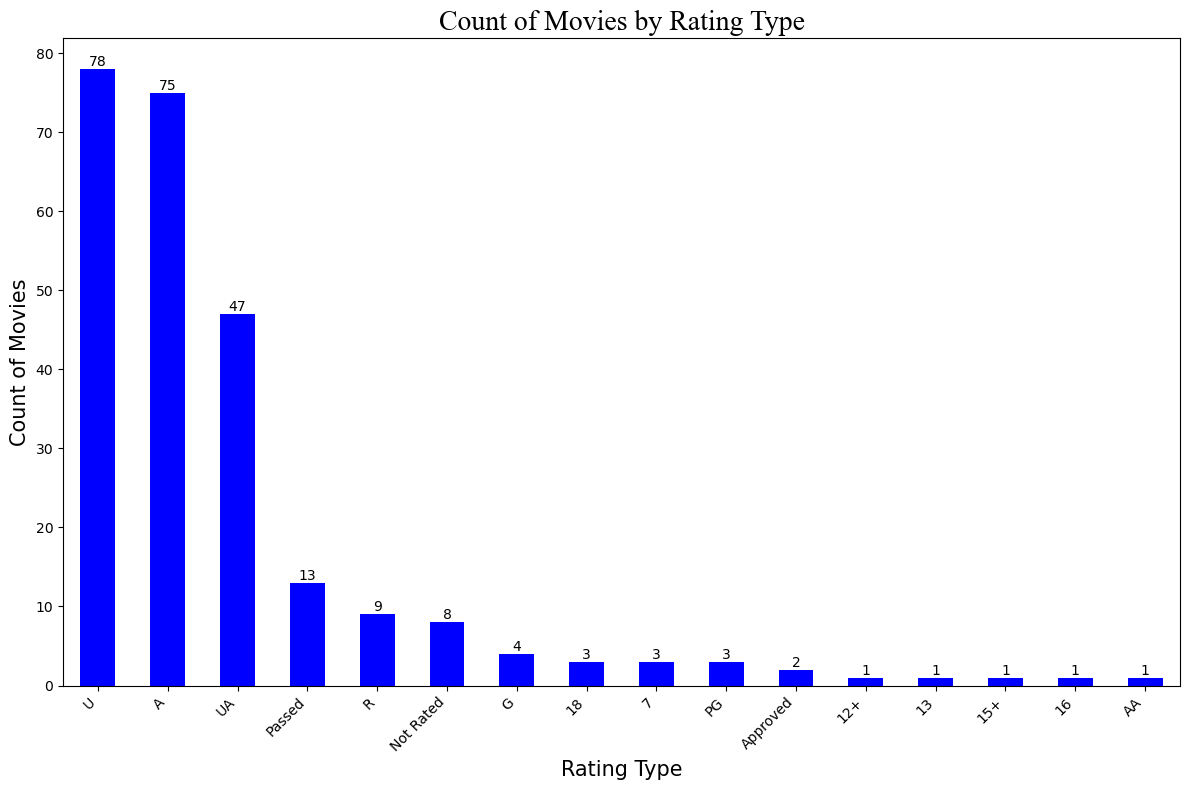

In [25]:
count_by_rating_type = df.groupby("Rating Type")['Movie Name'].count().nlargest(18)
plt.figure(figsize=(12,8))
bars = count_by_rating_type.plot(kind="bar",color = 'blue')
plt.xlabel("Rating Type", fontsize = 15)
plt.ylabel("Count of Movies", fontsize = 15)
plt.title("Count of Movies by Rating Type", font = 'Times New Roman', fontsize = 20)
plt.xticks(rotation=45, ha='right')

for i,j in enumerate(count_by_rating_type):
           plt.text(i,j, str(int(j)), ha='center', va="bottom", fontsize=10)
plt.tight_layout()
plt.show

([<matplotlib.axis.XTick at 0x11943341790>,
 [Text(1920, 0, '1920'),
  Text(1930, 0, '1930'),
  Text(1940, 0, '1940'),
  Text(1950, 0, '1950'),
  Text(1960, 0, '1960'),
  Text(1970, 0, '1970'),
  Text(1980, 0, '1980'),
  Text(1990, 0, '1990'),
  Text(2000, 0, '2000'),
  Text(2010, 0, '2010'),
  Text(2020, 0, '2020')])

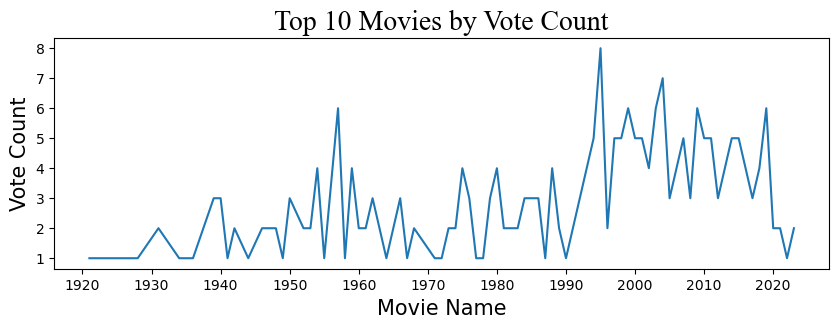

In [26]:
index = count_by_year.index
value = count_by_year.values
plt.figure(figsize=(10,3))
plt.plot(index,value)
plt.xlabel('Movie Name', fontsize = 15)
plt.ylabel('Vote Count', fontsize = 15)
plt.title('Top 10 Movies by Vote Count', font = 'Times New Roman', fontsize = 20)
plt.xticks(np.arange(1920, 2030, 10)) 

<function matplotlib.pyplot.show(close=None, block=None)>

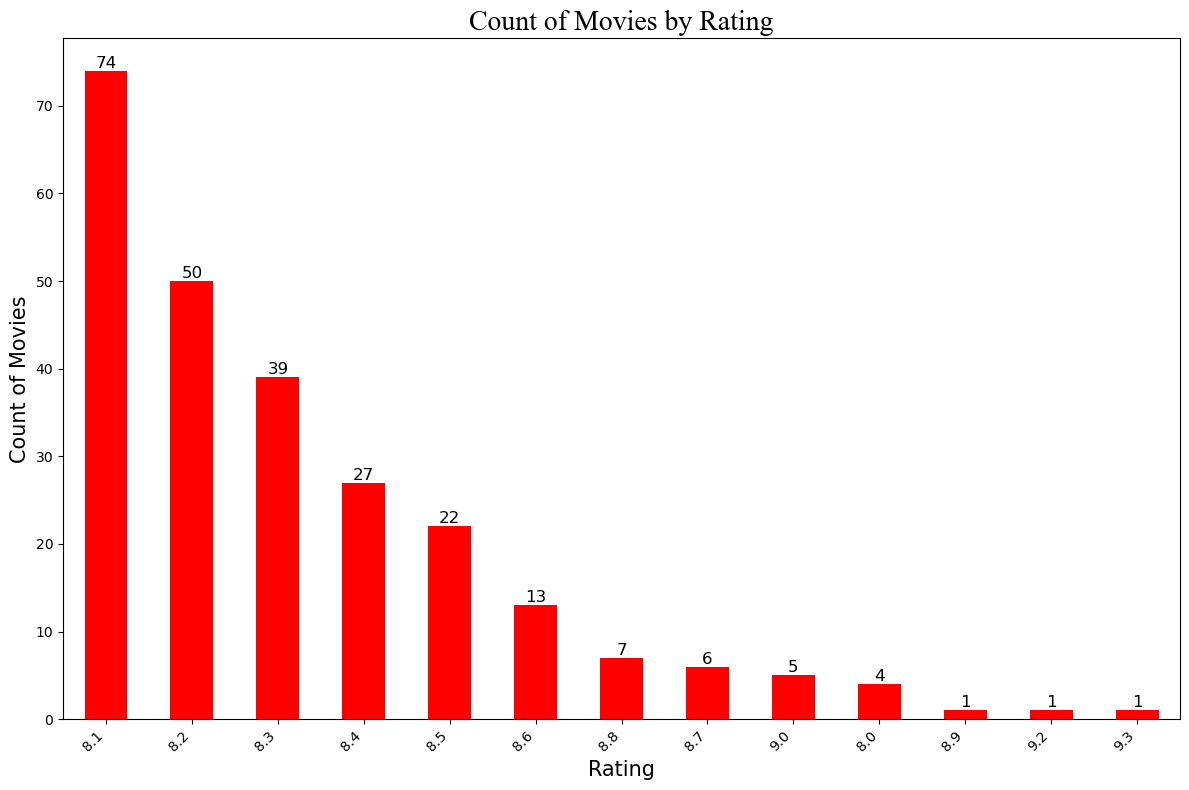

In [27]:
count_by_rating_type = df.groupby("Rating")['Movie Name'].count().nlargest(18)
plt.figure(figsize=(12,8))
bars = count_by_rating_type.plot(kind="bar",color = 'red')
plt.xlabel("Rating",fontsize = 15)
plt.ylabel("Count of Movies",fontsize = 15)
plt.title("Count of Movies by Rating", font = 'Times New Roman',fontsize = 20)
plt.xticks(rotation=45, ha='right')

for i,j in enumerate(count_by_rating_type):
           plt.text(i,j, str(int(j)), ha='center', va="bottom", fontsize=12)
plt.tight_layout()
plt.show

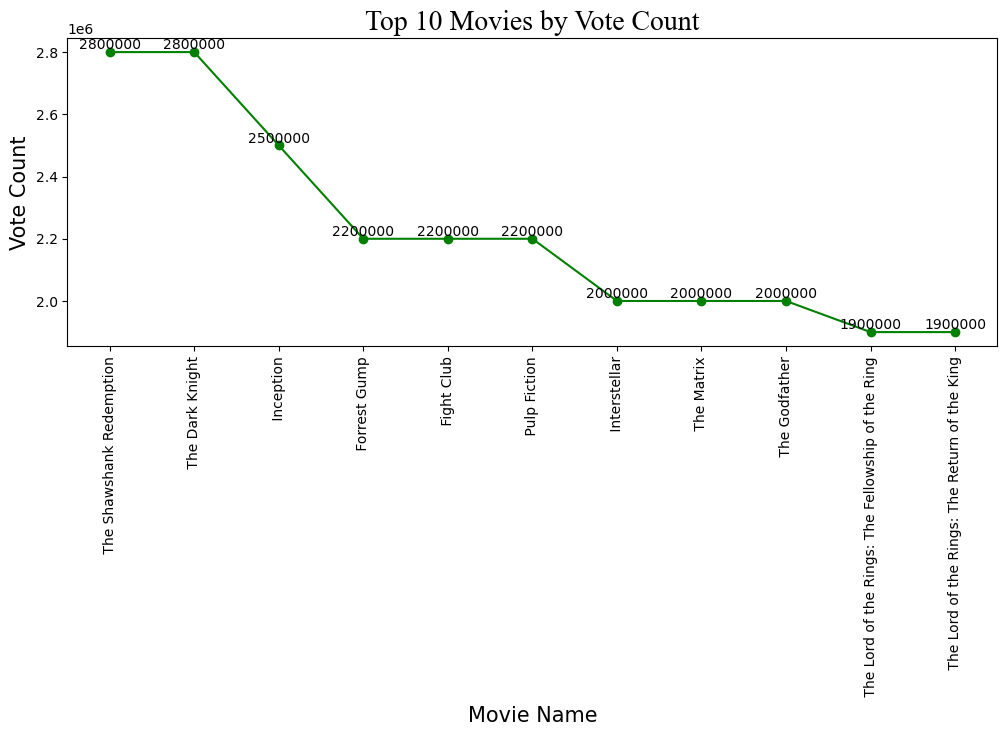

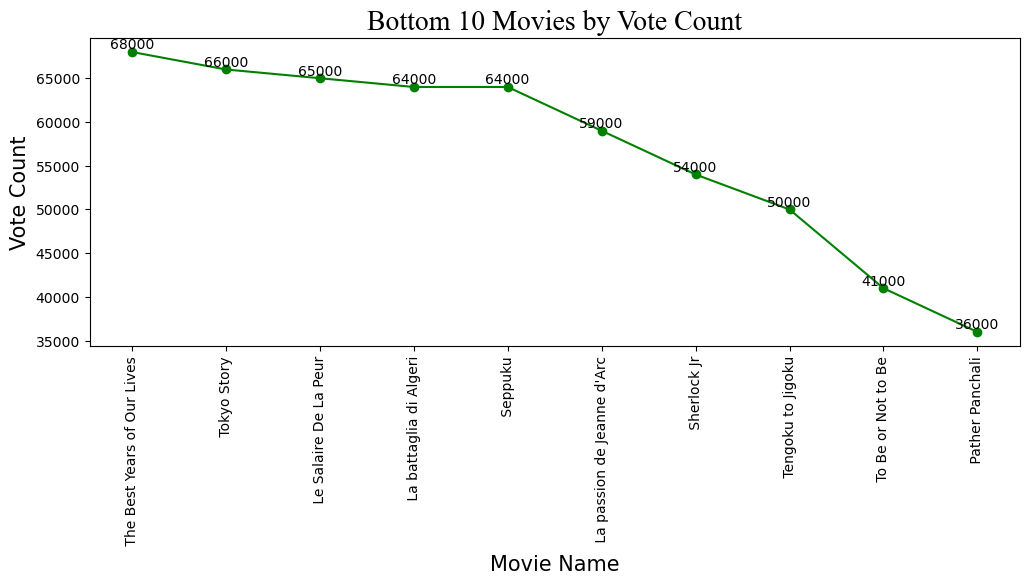

In [28]:
top_viewer_counts = df.sort_values(by=['Votes'], ascending = False)[:11]
plt.figure(figsize=(12,4))
plt.plot(top_viewer_counts['Movie Name'],top_viewer_counts['Votes'], marker = 'o', color = 'green')
plt.xlabel('Movie Name', fontsize = 15)
plt.ylabel('Vote Count', fontsize = 15)
plt.title('Top 10 Movies by Vote Count', font = 'Times New Roman', fontsize = 20)
plt.xticks(rotation = 90)
for i, count in enumerate(top_viewer_counts['Votes']):
    plt.text(i, count, str(count), ha='center', va='bottom')
low_viewer_counts = df.sort_values(by=['Votes'], ascending = False)[-10:]
plt.figure(figsize=(12,4))
plt.plot(low_viewer_counts['Movie Name'],low_viewer_counts['Votes'], marker = 'o', color = 'green')
plt.xlabel('Movie Name', fontsize = 15)
plt.ylabel('Vote Count', fontsize = 15)
plt.title('Bottom 10 Movies by Vote Count', font = 'Times New Roman', fontsize = 20)
plt.xticks(rotation = 90)
for i, count in enumerate(low_viewer_counts['Votes']):
    plt.text(i, count, str(count), ha='center', va='bottom')